In [3]:
####   import required function 
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d

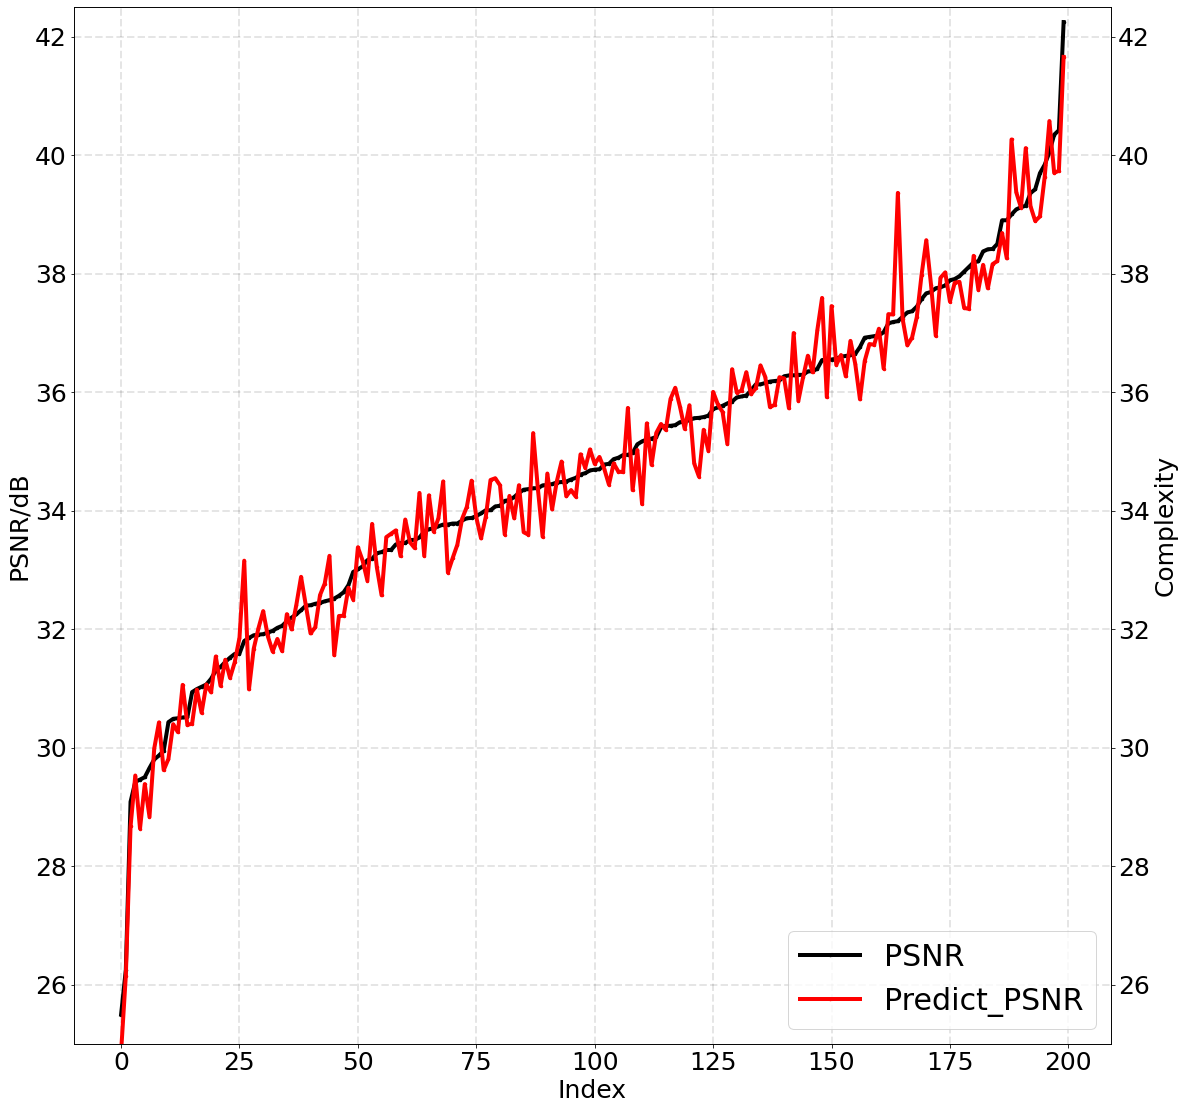

In [8]:
################   Same model
fig = plt.figure(figsize=(18, 18))   
left, bottom, width, height = 0.2, 0.2, 0.8, 0.8  
ax1 = fig.add_axes([left, bottom, width, height])
ax2 = ax1.twinx()

images_num = 200
index = np.arange(0,images_num)

psnr_group = [35.6023, 33.1638, 32.2486, 34.1645, 38.9001, 34.4254, 39.6954, 36.2906,
        33.7352, 36.5501, 35.4926, 33.4531, 36.9440, 32.4030, 37.8875, 34.3528,
        33.8704, 33.3347, 33.7819, 35.7694, 34.6322, 35.1185, 37.6901, 29.9477,
        33.2999, 36.1962, 32.1943, 32.0213, 36.3947, 33.5057, 37.7685, 36.5972,
        35.5789, 36.1778, 35.4303, 34.9728, 33.5033, 31.1612, 34.7776, 33.6502,
        38.1094, 37.1836, 36.5408, 36.2840, 39.4236, 31.8953, 30.5115, 29.8671,
        29.5005, 38.9993, 37.2719, 34.6976, 33.5460, 31.9699, 36.3526, 35.4312,
        32.0547, 35.5655, 40.3441, 34.0059, 37.0118, 30.4293, 31.5871, 33.2797,
        34.9423, 39.0835, 34.6914, 30.4946, 32.1311, 29.4211, 35.5593, 31.4450,
        34.0695, 35.5281, 31.9058, 36.1542, 37.5692, 35.2440, 37.7525, 40.4203,
        31.3612, 29.6561, 32.3194, 37.9086, 35.2148, 33.9083, 31.2985, 34.4321,
        35.8409, 33.0086, 33.4511, 38.8998, 34.6083, 31.7997, 36.5484, 33.1858,
        37.4425, 36.6432, 35.9421, 38.5007, 36.2915, 36.9188, 26.2469, 25.4923,
        34.9375, 34.3625, 32.4276, 31.0262, 32.5620, 37.6669, 33.8329, 35.2008,
        30.9366, 30.5080, 34.4905, 37.1974, 35.4968, 35.4427, 34.0060, 35.4055,
        36.7604, 34.0825, 34.4827, 31.9144, 33.7651, 35.1683, 36.3494, 36.6100,
        37.1594, 34.7893, 33.8754, 36.2671, 36.9555, 32.9638, 36.0302, 32.3945,
        37.9560, 38.4165, 32.7418, 34.6774, 38.1904, 34.5529, 32.4414, 30.4858,
        35.7143, 29.7995, 42.2459, 39.1205, 33.3349, 33.6848, 32.5150, 37.8006,
        37.3652, 31.5181, 29.0853, 34.3772, 36.2816, 34.2291, 30.9877, 32.4689,
        35.9106, 38.3742, 34.1772, 36.1869, 35.9258, 33.9533, 33.0582, 37.3438,
        34.3777, 31.8499, 35.8086, 31.0642, 34.8930, 39.3582, 36.6230, 33.7642,
        36.9320, 33.7038, 32.6224, 34.8681, 38.0338, 38.4106, 34.2980, 34.5245,
        31.5808, 29.4595, 31.9413, 39.1461, 36.1292, 34.4472, 39.8376, 36.5652,
        34.4739, 33.4280, 40.0476, 32.4886, 35.7407, 33.7815, 38.2071, 36.1302]
complexity_group = [35.0093, 32.8184, 32.4076, 33.5961, 38.2575, 33.5585, 38.9657, 35.8542,
        33.8711, 37.4518, 35.7536, 33.8488, 36.7995, 31.9269, 37.5273, 33.6354,
        34.0634, 33.5524, 33.4249, 35.6633, 34.7203, 35.0219, 37.8154, 29.6193,
        32.5702, 36.2504, 31.9941, 31.8335, 37.0465, 33.3663, 37.9299, 36.6255,
        35.3635, 35.7464, 35.3621, 34.3448, 33.4642, 30.9321, 34.7079, 33.2369,
        37.4045, 37.3099, 37.5893, 36.9971, 38.8878, 31.6669, 30.3807, 30.4248,
        29.3838, 40.2638, 37.2373, 34.9054, 34.2980, 31.6210, 36.3341, 35.8843,
        31.6277, 34.5742, 39.7021, 33.8959, 36.3970, 29.8097, 31.8539, 33.0422,
        35.7329, 39.3730, 34.7875, 30.2598, 32.2515, 29.5283, 34.7964, 31.4827,
        34.5459, 35.7775, 32.0123, 36.2571, 37.9743, 35.3117, 36.9506, 39.7348,
        31.0420, 28.8325, 32.8815, 37.8462, 34.7719, 33.8847, 31.5374, 34.6252,
        36.3854, 33.3811, 33.2318, 38.6846, 34.9502, 33.1543, 35.9147, 33.7748,
        37.2648, 36.4789, 36.3360, 38.2130, 36.2549, 36.5246, 26.1453, 24.8580,
        34.6499, 33.5927, 32.0301, 30.5875, 32.2208, 38.5630, 33.8608, 35.4723,
        30.4055, 31.0581, 34.2422, 39.3624, 35.3776, 36.0730, 34.5164, 35.4616,
        35.8784, 34.4266, 34.8278, 32.3031, 32.9532, 34.1101, 36.6142, 36.2662,
        37.3155, 34.4380, 34.5047, 36.2305, 37.0699, 32.4985, 35.9639, 32.4015,
        37.8614, 38.1593, 32.6974, 35.0322, 38.2998, 34.2350, 32.5732, 30.3939,
        36.0036, 29.9849, 41.6580, 39.1132, 33.6095, 34.2573, 31.5600, 38.0199,
        36.9201, 31.1763, 28.6680, 35.3076, 35.7270, 33.8700, 30.9776, 32.7693,
        35.9907, 38.1479, 34.2474, 35.7858, 36.0262, 33.5307, 33.1544, 36.7898,
        34.3665, 30.9833, 35.1257, 31.0648, 34.6571, 39.1409, 36.8644, 34.4915,
        36.8106, 33.6432, 32.2250, 34.7963, 37.4212, 37.7516, 34.4278, 34.3461,
        31.4423, 28.6330, 31.8752, 40.1181, 36.0660, 34.0207, 39.6291, 36.4596,
        34.4948, 33.6656, 40.5750, 33.2362, 35.7916, 33.1961, 37.7281, 36.4500]

psnr_group, complexity_group = np.array(psnr_group), np.array(complexity_group)
index_sort = np.argsort(psnr_group)
psnr_group, complexity_group = psnr_group[index_sort], complexity_group[index_sort]

ins1 = ax1.plot(index, psnr_group, 'k.-', markersize=5, linewidth=4.0)
# ins2 = ax1.plot(index, gaussian_filter1d(psnr_group, sigma=5), 'b.--', markersize=5, linewidth=4.0)

ins3 = ax2.plot(index, complexity_group, 'r.-', markersize=5, linewidth=4.0)
# ins4 = ax2.plot(index, gaussian_filter1d(complexity_group, sigma=15), 'g.-', markersize=5, linewidth=6.0)

ins = ins1+ins3
ax1.set_xlabel("Index", fontdict={ 'size': 25})
ax1.set_ylabel("PSNR/dB", fontdict={'size': 25})
ax2.set_ylabel("Complexity", fontdict={'size': 25})
ax1.set_ylim(25, 42.5)
ax2.set_ylim(25, 42.5)

ax1.tick_params(labelsize = 25)  
ax2.tick_params(labelsize = 25)  

ax1.legend(ins, ['PSNR',  'Predict_PSNR'], prop={'size': 30}, loc='lower right')
ax1.grid(linewidth=2, alpha= 0.1, color='black',linestyle='--',)


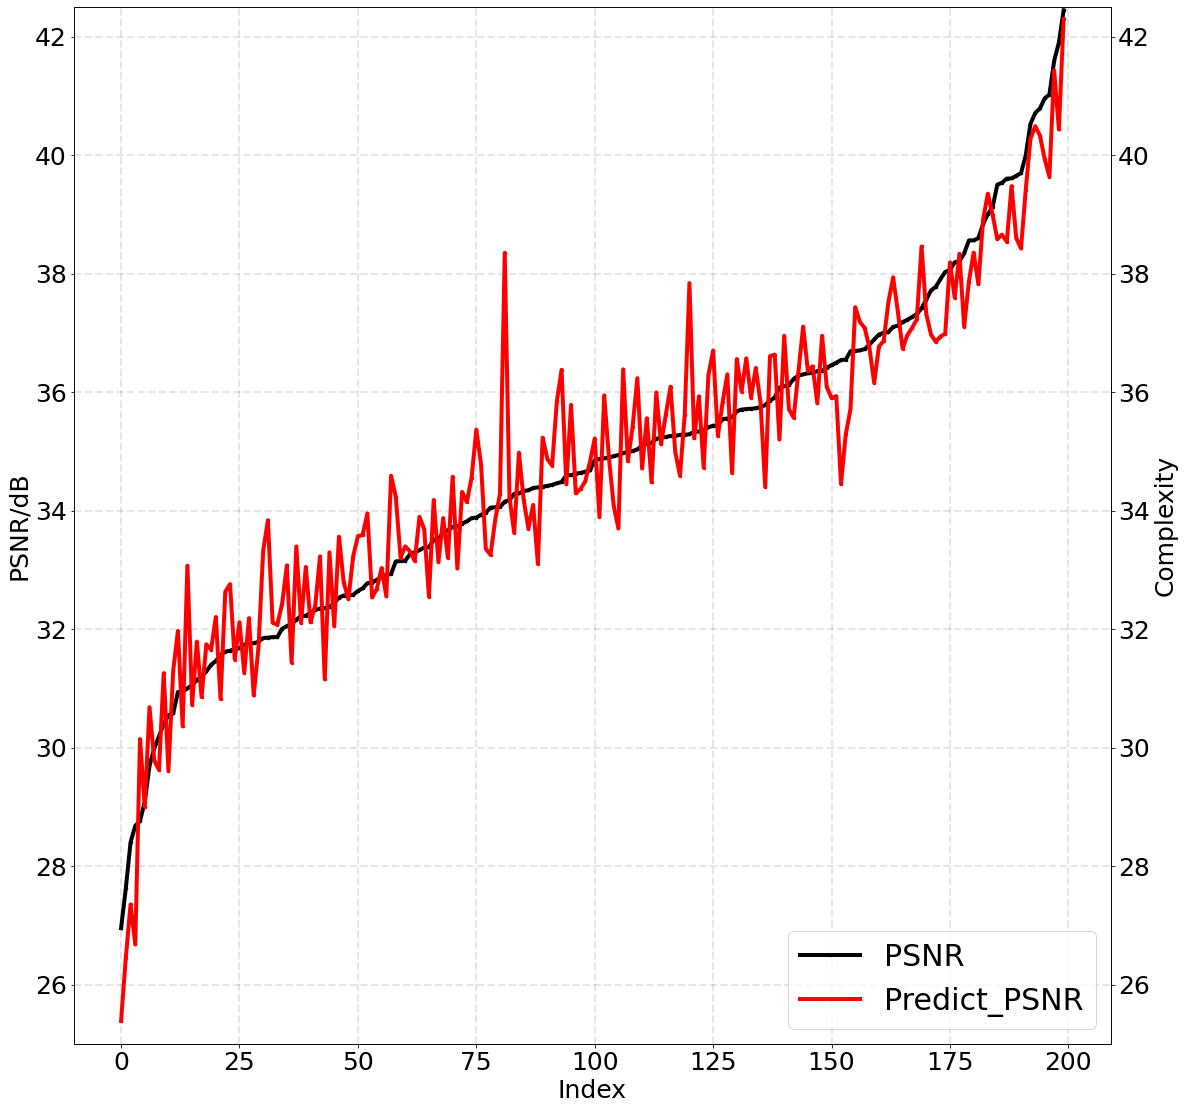

In [10]:
################   small model
fig = plt.figure(figsize=(18, 18))   
left, bottom, width, height = 0.2, 0.2, 0.8, 0.8  
ax1 = fig.add_axes([left, bottom, width, height])
ax2 = ax1.twinx()

images_num = 200
index = np.arange(0,images_num)

psnr_group = [31.7574, 35.7479, 36.4552, 31.8562, 37.7156, 36.1029, 31.7625, 30.1874,
        35.7056, 36.4105, 31.6782, 30.4065, 31.6331, 38.1903, 33.1479, 37.9086,
        34.8886, 32.1590, 36.9715, 36.3216, 35.3351, 36.5484, 35.5541, 35.2880,
        34.8526, 40.9578, 34.0609, 41.5902, 33.9652, 39.6954, 34.0564, 35.4396,
        32.0510, 36.2783, 32.0066, 27.6239, 33.2972, 30.5427, 32.9183, 35.0327,
        38.0599, 32.3705, 36.3546, 37.7764, 39.1205, 33.1414, 29.9847, 33.7339,
        35.7186, 30.9379, 37.1199, 32.3242, 39.5006, 33.5068, 36.3185, 32.6866,
        33.7798, 34.6246, 39.6041, 37.2669, 37.5604, 34.2822, 32.5769, 29.0833,
        34.4617, 34.9861, 34.9209, 33.3752, 31.5629, 28.7624, 31.2053, 32.8750,
        38.5992, 31.0543, 36.6940, 40.5282, 37.4148, 34.8832, 32.5727, 34.3322,
        33.3807, 36.8009, 37.3149, 41.8995, 35.4320, 36.7260, 28.6806, 31.2845,
        34.1772, 35.6784, 35.1428, 31.6671, 32.2242, 35.9077, 39.6512, 37.2199,
        32.4429, 36.8879, 34.4168, 35.7273, 32.3473, 34.8695, 35.7815, 35.2313,
        35.2777, 36.3643, 33.6682, 35.8567, 34.9743, 34.3826, 39.0048, 29.6929,
        39.9962, 35.2808, 34.6576, 37.0001, 31.7352, 38.5602, 28.4015, 34.4043,
        31.3975, 32.5320, 38.3418, 35.3575, 41.0228, 34.3434, 34.5948, 38.8373,
        35.1310, 33.8185, 32.8323, 26.9517, 35.2594, 34.4823, 38.0277, 34.6344,
        35.2416, 30.9422, 35.0997, 35.5449, 32.9313, 31.1406, 33.6263, 33.5243,
        35.7132, 30.5760, 39.6063, 35.5765, 36.2992, 32.3526, 38.2085, 31.6213,
        32.2214, 32.7831, 35.0058, 35.2106, 36.0740, 31.8635, 32.0837, 31.8655,
        32.6452, 36.2225, 31.4608, 34.2913, 39.5341, 37.1818, 37.1017, 33.8724,
        34.9360, 35.2612, 42.4440, 31.7840, 37.0122, 36.5424, 38.5602, 34.4346,
        33.3330, 33.8827, 32.5658, 36.1215, 34.1511, 30.9999, 34.3909, 32.2780,
        36.7044, 36.6892, 34.5979, 33.9295, 33.2650, 40.7108, 40.7888, 31.8493,
        34.6776, 34.0498, 36.4955, 35.3313, 35.4077, 33.1554, 33.7244, 32.7746]
complexity_group = [32.1849, 35.8286, 35.8990, 33.8354, 36.9702, 36.9502, 30.8801, 29.6233,
        36.0073, 36.0826, 32.1153, 31.2563, 32.7579, 37.5958, 33.2080, 36.9377,
        34.8929, 33.3941, 36.7677, 36.4347, 35.9283, 35.2904, 36.2977, 37.8400,
        35.2160, 39.9327, 34.2874, 41.4302, 33.3543, 38.4238, 33.8486, 35.2574,
        33.0738, 36.3423, 32.4279, 26.4556, 33.1505, 29.6119, 32.5519, 36.2349,
        38.1889, 33.2946, 35.8133, 36.8508, 38.9942, 34.2315, 29.7851, 33.0235,
        35.9078, 31.9684, 37.3568, 32.4025, 38.5804, 34.1783, 36.3567, 33.5883,
        34.3158, 34.2917, 38.5362, 37.0820, 37.3187, 33.6237, 33.2282, 29.0010,
        35.8429, 34.8334, 34.0853, 33.6872, 30.8223, 30.1435, 30.8533, 33.0305,
        37.8209, 30.7224, 37.4331, 40.2752, 38.4585, 35.9431, 32.5059, 34.1821,
        32.5468, 36.7481, 37.2288, 40.4330, 36.7016, 37.0818, 26.6777, 31.7432,
        34.2268, 36.5569, 34.4762, 31.4839, 33.0496, 36.6335, 38.5995, 36.9605,
        32.0535, 36.1579, 34.8728, 36.4067, 33.2262, 33.8961, 34.3981, 35.1211,
        34.5892, 36.9507, 33.2056, 36.6062, 36.3828, 34.0963, 39.3491, 30.6797,
        39.4150, 35.6147, 34.4960, 36.8654, 31.2667, 38.3537, 27.3514, 35.2310,
        31.6532, 33.5593, 37.1064, 34.7230, 39.6383, 33.6973, 34.4452, 38.9168,
        35.5574, 34.1440, 32.6803, 25.3870, 36.0920, 36.3759, 36.9856, 34.3647,
        35.6146, 30.3586, 34.7110, 35.8304, 34.5895, 31.7887, 33.8727, 33.1337,
        36.5703, 31.2969, 39.4765, 34.6348, 37.1054, 31.1525, 38.3342, 32.6303,
        32.1057, 32.5350, 35.4165, 35.9939, 35.2003, 32.1089, 31.4355, 32.0736,
        33.5684, 35.5683, 32.2043, 34.9779, 38.6579, 36.7338, 37.9355, 34.5542,
        33.6984, 34.9913, 42.2946, 31.6829, 37.5157, 34.4475, 37.8666, 34.7586,
        33.8965, 35.3655, 32.7869, 35.7109, 38.3510, 33.0701, 33.0986, 32.1144,
        37.1815, 35.7096, 35.7839, 34.7784, 33.3093, 40.4884, 40.3294, 33.3196,
        34.8267, 33.2514, 35.9320, 35.2205, 36.2867, 33.3948, 34.5703, 33.9518]

psnr_group, complexity_group = np.array(psnr_group), np.array(complexity_group)
index_sort = np.argsort(psnr_group)
psnr_group, complexity_group = psnr_group[index_sort], complexity_group[index_sort]

ins1 = ax1.plot(index, psnr_group, 'k.-', markersize=5, linewidth=4.0)
# ins2 = ax1.plot(index, gaussian_filter1d(psnr_group, sigma=5), 'b.--', markersize=5, linewidth=4.0)

ins3 = ax2.plot(index, complexity_group, 'r.-', markersize=5, linewidth=4.0)
# ins4 = ax2.plot(index, gaussian_filter1d(complexity_group, sigma=15), 'g.-', markersize=5, linewidth=6.0)

ins = ins1+ins3
ax1.set_xlabel("Index", fontdict={ 'size': 25})
ax1.set_ylabel("PSNR/dB", fontdict={'size': 25})
ax2.set_ylabel("Complexity", fontdict={'size': 25})
ax1.set_ylim(25, 42.5)
ax2.set_ylim(25, 42.5)

ax1.tick_params(labelsize = 25)  
ax2.tick_params(labelsize = 25)  

ax1.legend(ins, ['PSNR',  'Predict_PSNR'], prop={'size': 30}, loc='lower right')
ax1.grid(linewidth=2, alpha= 0.1, color='black',linestyle='--',)


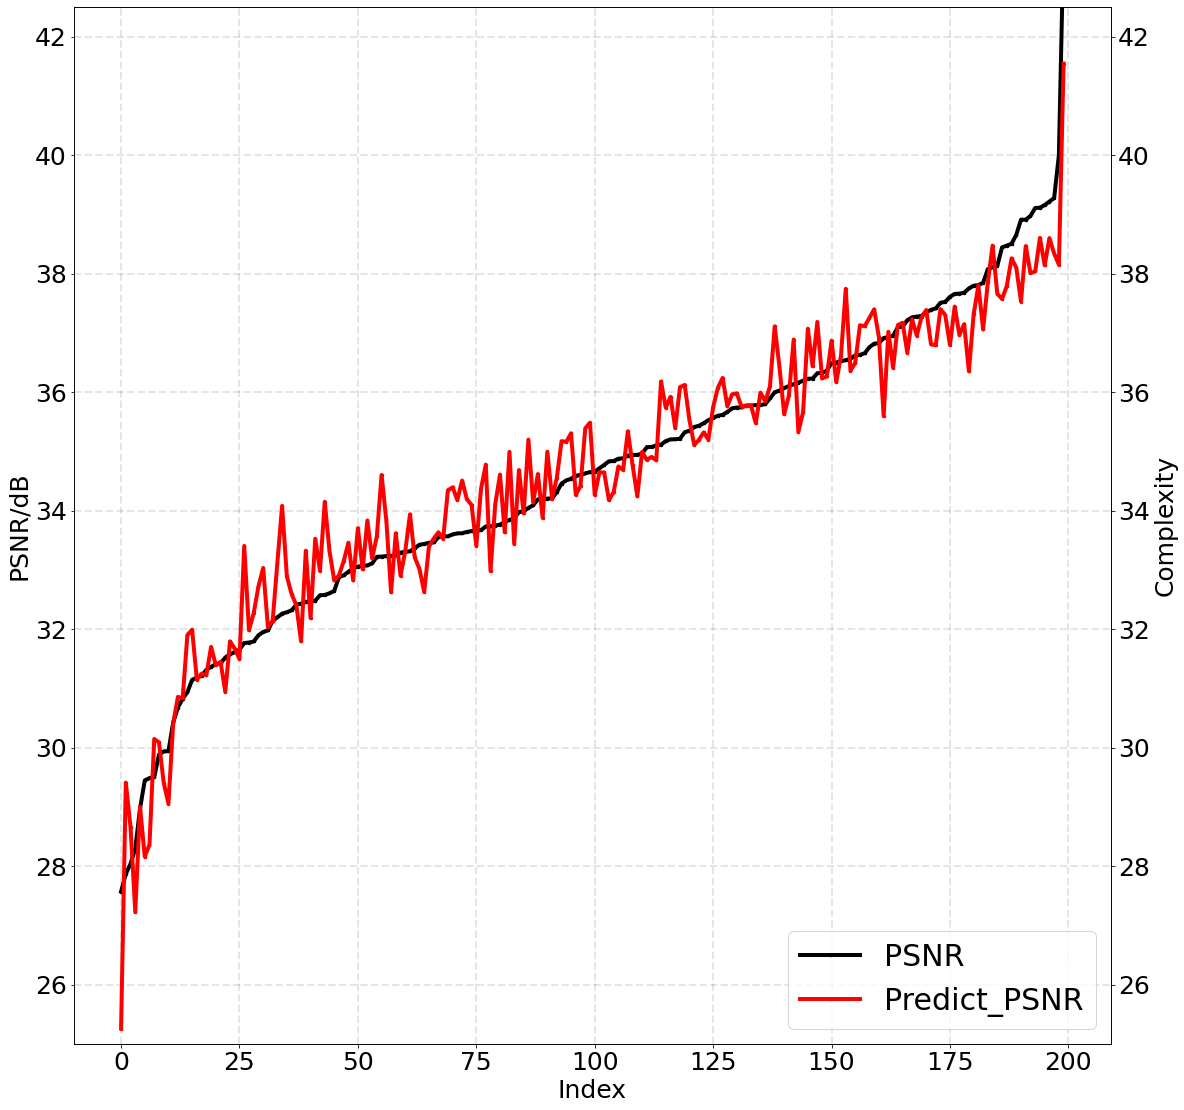

In [12]:
################   tiny model
fig = plt.figure(figsize=(18, 18))   
left, bottom, width, height = 0.2, 0.2, 0.8, 0.8  
ax1 = fig.add_axes([left, bottom, width, height])
ax2 = ax1.twinx()

images_num = 200
index = np.arange(0,images_num)

psnr_group = [35.7722, 36.5624, 35.7394, 35.0730, 34.5895, 35.4315, 32.6449, 33.8432,
        29.9393, 37.8053, 34.1941, 34.7714, 35.2044, 33.2358, 31.4215, 37.6079,
        36.1004, 33.6534, 34.6548, 33.3132, 33.6153, 33.6396, 33.6640, 36.1596,
        38.9109, 37.2140, 31.5203, 32.8774, 37.7500, 35.7971, 31.8949, 33.6178,
        30.4244, 37.1038, 32.1985, 32.1387, 33.4363, 36.9127, 33.2239, 38.9104,
        34.8818, 29.4848, 33.2201, 32.3172, 37.5079, 37.6616, 34.6498, 33.9768,
        32.4689, 38.1071, 29.4450, 31.7908, 35.9973, 33.5518, 31.9522, 39.1577,
        36.1332, 34.9278, 38.4732, 31.5747, 39.1073, 32.5712, 36.0695, 35.7802,
        35.5644, 33.7324, 36.4890, 34.8757, 32.5759, 36.3252, 36.9512, 33.2316,
        30.6760, 29.5025, 37.0959, 34.4567, 37.2849, 35.3478, 37.8450, 35.6015,
        33.3660, 36.3613, 31.3106, 37.6775, 36.3185, 32.4798, 34.0894, 38.4427,
        27.8667, 31.9770, 35.2018, 32.4104, 38.6549, 36.0257, 34.9410, 31.1437,
        37.4125, 27.5691, 35.1008, 35.4111, 36.9279, 36.1925, 33.4623, 37.3465,
        36.5232, 36.2276, 29.9347, 31.3634, 34.0460, 30.8248, 28.9687, 36.8176,
        38.1312, 35.8947, 35.7815, 28.2950, 33.4571, 34.1887, 34.3143, 36.6289,
        35.5266, 33.5662, 38.0756, 39.1130, 34.6284, 37.7960, 33.2904, 33.8667,
        28.0385, 35.7723, 35.1132, 37.2754, 33.0750, 31.6123, 35.0717, 34.8361,
        35.6648, 34.5367, 36.7579, 37.2609, 34.9377, 34.6009, 33.6695, 31.7725,
        33.5980, 33.3048, 33.7332, 37.3884, 43.6737, 34.5104, 35.7258, 31.4056,
        33.8069, 33.9868, 32.9078, 36.2253, 33.0676, 34.2056, 39.2752, 35.3233,
        34.2030, 33.0252, 35.7417, 36.4983, 32.2850, 33.4243, 34.7148, 37.5238,
        31.7652, 31.6526, 30.9340, 36.8279, 32.2603, 34.9597, 38.5028, 36.6192,
        36.5387, 36.6563, 32.4287, 38.9740, 35.2119, 35.1735, 39.2160, 33.1088,
        33.2445, 37.6579, 35.6152, 33.7464, 32.9664, 32.6047, 32.4595, 33.0547,
        34.8319, 29.8806, 33.7630, 33.5644, 31.2123, 35.4749, 39.9988, 31.1824]
complexity_group = [35.7735, 36.3586, 35.9783, 34.9062, 34.2646, 35.1952, 32.8209, 34.9908,
        29.0550, 37.7992, 33.8773, 34.6436, 35.3918, 32.6226, 31.4476, 36.7934,
        35.9445, 34.0946, 34.2642, 33.9360, 34.1775, 34.1934, 33.4103, 35.3298,
        38.4645, 36.6649, 30.9412, 32.9059, 36.3503, 35.8419, 32.7202, 34.5074,
        30.4095, 37.1702, 33.1235, 32.1356, 32.6273, 35.5952, 34.6009, 37.5280,
        34.6886, 28.3635, 33.5654, 32.5919, 37.3985, 36.9654, 35.4846, 34.6835,
        32.1851, 38.4717, 28.1603, 32.2685, 37.1095, 33.6333, 33.0307, 38.1392,
        36.8874, 35.3382, 37.7909, 31.7921, 38.0372, 32.9812, 35.6275, 35.4749,
        35.7467, 34.7756, 36.8672, 34.7442, 34.1488, 36.2297, 36.4099, 33.8354,
        30.8561, 30.1444, 37.1308, 35.1720, 37.2664, 35.5264, 37.0573, 36.0722,
        33.2114, 36.2647, 31.2213, 37.1471, 37.1840, 33.5245, 34.1402, 37.5720,
        29.4080, 32.0365, 35.9203, 32.4014, 38.1018, 36.4281, 34.2404, 31.9900,
        36.7898, 25.2576, 34.8482, 35.1089, 37.0183, 35.6652, 33.5269, 37.3849,
        36.6170, 36.4361, 29.4072, 31.7000, 35.1978, 30.8305, 29.0007, 37.3970,
        37.6606, 36.0973, 35.9905, 27.2247, 33.3950, 34.6165, 34.5529, 37.1272,
        35.1991, 34.3429, 37.8552, 38.6025, 35.3876, 37.3138, 32.9002, 33.4387,
        28.6527, 35.7758, 36.1790, 36.9548, 33.8327, 31.6690, 34.8558, 34.3136,
        35.7623, 35.3047, 37.2535, 37.2296, 34.7641, 34.4182, 34.3700, 31.9808,
        34.3928, 33.3189, 32.9782, 36.8074, 41.5440, 35.1597, 35.9606, 31.3918,
        33.6328, 33.9518, 33.1463, 37.0700, 33.0086, 34.2019, 38.3383, 36.1214,
        34.9944, 32.8213, 35.7545, 36.1698, 32.8908, 33.0141, 34.6456, 37.3028,
        33.4036, 31.4970, 31.9005, 36.9263, 34.0793, 34.9912, 38.2571, 36.4973,
        37.7435, 37.1121, 31.7938, 38.0083, 36.0836, 35.7370, 38.5993, 33.1936,
        33.6178, 37.4436, 36.2386, 34.1090, 33.4579, 33.3184, 33.3226, 33.7040,
        34.1754, 30.0865, 34.6080, 33.5241, 31.2476, 35.3190, 38.1515, 31.1466]

psnr_group, complexity_group = np.array(psnr_group), np.array(complexity_group)
index_sort = np.argsort(psnr_group)
psnr_group, complexity_group = psnr_group[index_sort], complexity_group[index_sort]

ins1 = ax1.plot(index, psnr_group, 'k.-', markersize=5, linewidth=4.0)
# ins2 = ax1.plot(index, gaussian_filter1d(psnr_group, sigma=5), 'b.--', markersize=5, linewidth=4.0)

ins3 = ax2.plot(index, complexity_group, 'r.-', markersize=5, linewidth=4.0)
# ins4 = ax2.plot(index, gaussian_filter1d(complexity_group, sigma=15), 'g.-', markersize=5, linewidth=6.0)

ins = ins1+ins3
ax1.set_xlabel("Index", fontdict={ 'size': 25})
ax1.set_ylabel("PSNR/dB", fontdict={'size': 25})
ax2.set_ylabel("Complexity", fontdict={'size': 25})
ax1.set_ylim(25, 42.5)
ax2.set_ylim(25, 42.5)

ax1.tick_params(labelsize = 25)  
ax2.tick_params(labelsize = 25)  

ax1.legend(ins, ['PSNR',  'Predict_PSNR'], prop={'size': 30}, loc='lower right')
ax1.grid(linewidth=2, alpha= 0.1, color='black',linestyle='--',)
